<a href="https://colab.research.google.com/github/tady0725/deeplearning/blob/my-store/%E3%80%8Clec08_MNIST_GPU_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Book by Chollet, Deep Learning with Python 

In [1]:
import keras
keras.__version__

'2.5.0'

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

----

classify hand-written digits. 

The problem we are trying to solve here is to <font color="red">classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9)</font>. 

The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. 

It's <font color="red">a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST)</font> in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. 

As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

* <font color="red">A class</font>: a category in a classification problem. Now {0, 1, 2, ..., 9} 
* <font color="red">Samples</font>: Data points. Now 0, 2, 4, 3   
* <font color="red">A label</font>: The class associated with a specific sample. Now 0, 2, 4, 3

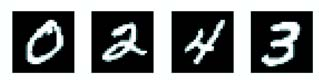

In [2]:
from IPython.display import Image
Image(filename='data/05-Chollet-MNIST-sample.jpg')

The MNIST dataset comes pre-loaded in Keras, in the form of <font color="red">a set of four Numpy arrays</font>:

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


* `train_images` and `train_labels` form the "training set", the data that the model will learn from.
* The model will then be tested on the "test set", `test_images` and `test_labels`. 
* Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. 
* There is a one-to-one correspondence between the images and the labels.
* Let's have a look at the training data:

In [4]:
train_images.shape, train_images.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
test_images.shape, test_images.dtype

((10000, 28, 28), dtype('uint8'))

# Data representations for neural networks

* We started from data stored in multidimensional Numpy arrays, also called tensors.
* A tensor is a container for data -- almost always numerical data.
* A tensor is defined by three key attributes: <br>
    1. Number of axes: A 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy
    2. Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis.
    3. Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on.

### The first image 

In [6]:
train_labels[0]

5

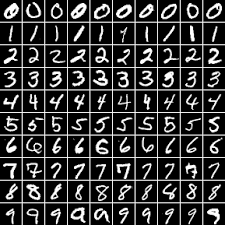

In [7]:
from IPython.display import Image
Image(filename='data/05-MNIST.png')
# https://www.google.com.tw/search?q=mnist+5+example&safe=strict&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjj35TfzPzaAhVFF5QKHQDQBQQQ_AUICigB&biw=1242&bih=535#imgdii=eDz5NFA-o0FzdM:&imgrc=DDeyErCS8Yf-MM:

* 0 是黑色，255 是白色 
* 8 位元，2^8 = 256

In [8]:
train_images.shape

(60000, 28, 28)

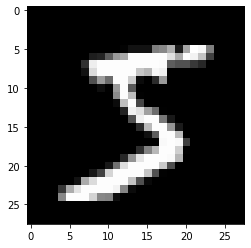

In [9]:
import matplotlib.pyplot as plt
# import numpy as np
plt.imshow(train_images[0,:,:], cmap = plt.cm.gray) 
plt.show()

In [10]:
train_images[0,7,:]

array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
       253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
         0,   0], dtype=uint8)

In [11]:
train_images[0] # Look at the top and bottom rows 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Let's have a look at the test data:

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [16]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our workflow will be as follow: 
* first we will present our neural network with the training data, `train_images` and `train_labels`.
* The network will then learn to associate images and labels. 
* Finally, we will ask the network to produce predictions for `test_images`, and we will verify if these predictions match the labels from `test_labels`.

In [17]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

* The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. 
* Precisely, layers extract _representations_ out of the data fed into them -- hopefully representations that are more meaningful for the problem at hand. 
* Most of deep learning really consists of chaining together simple layers which will implement a form of progressive "data distillation". 
* A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

* Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
* The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). 
* Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [18]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

* Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the `[0, 1]` interval. 
* Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with  values in the `[0, 255]` interval. 
* We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [19]:
train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

In [20]:
train_images1.shape

(60000, 784)

In [21]:
train_images1[0,:].max(), train_images1[0,:].min()

(1.0, 0.0)

We also need to categorically encode the labels:

In [22]:
from tensorflow.keras.utils import to_categorical

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

In [23]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [24]:
train_labels_categ[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [25]:
history = network.fit(train_images1, train_labels_categ, epochs= 5, batch_size=128, 
                      validation_data=(test_images1, test_labels_categ))

Epoch 1/5
469/469 [==============================] - 16s 4ms/step - loss: 0.4203 - accuracy: 0.8806 - val_loss: 0.1280 - val_accuracy: 0.9610
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.9685 - val_loss: 0.0916 - val_accuracy: 0.9718
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0698 - accuracy: 0.9791 - val_loss: 0.0742 - val_accuracy: 0.9772
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0470 - accuracy: 0.9864 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.0676 - val_accuracy: 0.9799


In [26]:
1 / 60000

1.6666666666666667e-05

* A microsecond is an SI unit of time equal to one millionth (0.000001 or 10−6 or 1/1,000,000) of a second. Its symbol is μs.


## 8.2.2 Performance 

In [27]:
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size=128, 
                      validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.0703 - val_accuracy: 0.9800
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0205 - accuracy: 0.9944 - val_loss: 0.0673 - val_accuracy: 0.9818
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0696 - val_accuracy: 0.9817
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0127 - accuracy: 0.9966 - val_loss: 0.0685 - val_accuracy: 0.9814
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.0699 - val_accuracy: 0.9831
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0760 - val_accuracy: 0.9816
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0783 - val_accuracy: 0.9811
Epoch 

In [28]:
history_dict = history.history
history_dict.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
list(history_dict.keys())

['loss', 'accuracy', 'val_loss', 'val_accuracy']

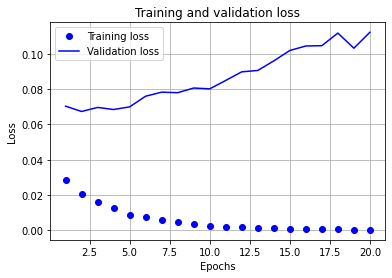

In [30]:
import matplotlib.pyplot as plt

acc = history.history[list(history_dict.keys())[1]]
val_acc = history.history[list(history_dict.keys())[3]]
loss = history.history[list(history_dict.keys())[0]]
val_loss = history.history[list(history_dict.keys())[2]]

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

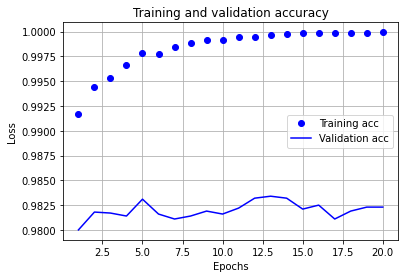

In [31]:
plt.clf()   # clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [32]:
history.history['accuracy'][19] 

0.9999333620071411

In [33]:
history.history['accuracy'][19] * 60000

59996.00172042847

In [34]:
history.history['val_accuracy'][19]

0.9822999835014343

In [35]:
history.history['val_accuracy'][19] * 10000

9822.999835014343

### google fit keras 
* https://keras.io/models/sequential/
* batch_size: Integer or None. Number of samples per gradient update. If unspecified, it will default to 32.
* epochs: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
* Right now 

In [36]:
len(train_labels), ( 60000  // 128 + 1)*5 # gradient updates 

(60000, 2345)

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [37]:
test_loss, test_acc = network.evaluate(test_images1, test_labels_categ)

313/313 [==============================] - 1s 2ms/step - loss: 0.1123 - accuracy: 0.9823


In [38]:
print('test_acc:', test_acc)

test_acc: 0.9822999835014343


In [39]:
prediction = network.predict_classes(test_images1)
prediction

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

In [40]:
network.predict(test_images1)

array([[3.0285952e-19, 5.1324380e-25, 3.1622176e-19, ..., 1.0000000e+00,
        4.2703704e-18, 8.8955750e-16],
       [4.6066734e-26, 8.6891322e-19, 1.0000000e+00, ..., 0.0000000e+00,
        2.0832951e-24, 0.0000000e+00],
       [5.5182430e-18, 9.9999988e-01, 1.1803136e-09, ..., 2.2058805e-10,
        9.6455828e-08, 2.6400890e-17],
       ...,
       [3.3748916e-35, 2.3243704e-29, 1.9780477e-29, ..., 3.1588333e-13,
        4.6258362e-17, 3.3639703e-14],
       [6.5090768e-26, 4.1024012e-28, 2.9417529e-31, ..., 1.0954516e-24,
        4.5351971e-13, 4.4449323e-29],
       [4.7164443e-24, 0.0000000e+00, 6.2335511e-27, ..., 0.0000000e+00,
        1.1056657e-32, 5.8526318e-30]], dtype=float32)

In [41]:
network.predict(test_images1)[0,:]

array([3.0285952e-19, 5.1324380e-25, 3.1622176e-19, 5.3772043e-12,
       2.3156099e-28, 3.0746359e-18, 8.4557652e-32, 1.0000000e+00,
       4.2703704e-18, 8.8955750e-16], dtype=float32)

In [42]:
network.predict(test_images1)[9999,:]

array([4.7164443e-24, 0.0000000e+00, 6.2335511e-27, 1.3475683e-30,
       1.5813577e-20, 7.0080723e-24, 1.0000000e+00, 0.0000000e+00,
       1.1056657e-32, 5.8526318e-30], dtype=float32)

# confusion matrix

In [43]:
test_labels_categ

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
import numpy as np
np.vstack((test_labels[220:240], prediction[220:240]))

array([[7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1],
       [7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1]])

In [45]:
len(test_labels)

10000

In [46]:
import pandas as pd
pd.crosstab(test_labels, prediction,
            rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,0,1,1,0,1,1,2,0
1,0,1125,1,2,0,1,2,1,3,0
2,3,1,1013,0,1,0,2,4,7,1
3,0,0,4,997,0,3,0,1,3,2
4,2,0,2,1,964,0,3,2,2,6
5,4,0,0,8,1,870,3,1,4,1
6,4,2,2,1,4,2,939,0,4,0
7,1,1,10,4,1,0,0,1000,5,6
8,4,0,4,2,4,2,0,2,952,4


when  3818 : test_labels is  0 , but predict  4


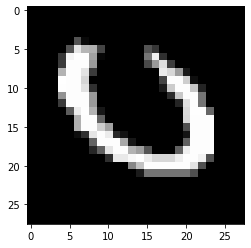

when  4065 : test_labels is  0 , but predict  3


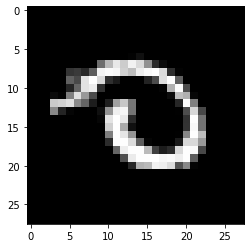

when  4880 : test_labels is  0 , but predict  8


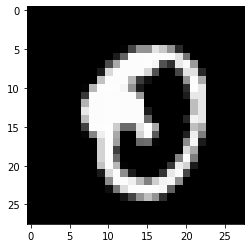

when  6597 : test_labels is  0 , but predict  7


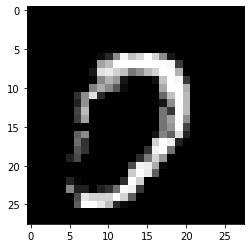

when  8325 : test_labels is  0 , but predict  6


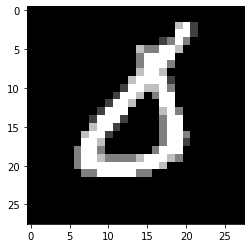

when  9634 : test_labels is  0 , but predict  8


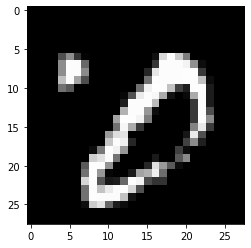

In [48]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(test_labels)):
    if (test_labels[i] != prediction[i]) & (test_labels[i] == 0):
        print('when ', i, ': test_labels is ', test_labels[i], ', but predict ', prediction[i])
        plt.imshow(test_images[i,:,:], cmap = plt.cm.gray) 
        plt.show()

In [49]:
network.predict(test_images1)[6597,:]

array([1.4592365e-07, 3.9607747e-32, 4.6895332e-14, 1.0035591e-06,
       1.0926375e-31, 4.2839912e-17, 6.9107648e-32, 9.9999106e-01,
       5.9314324e-20, 7.7545974e-06], dtype=float32)

## 8.2.3 Overfitting (過度配適) and Underfitting (低度擬合)  

In [50]:
0.9999 - 0.9827 

0.017199999999999993

In [51]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dense(10, activation='softmax')) # output layer
 
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4727 - accuracy: 0.8703 - val_loss: 0.1499 - val_accuracy: 0.9565
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1392 - accuracy: 0.9589 - val_loss: 0.1038 - val_accuracy: 0.9693
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0891 - accuracy: 0.9739 - val_loss: 0.0906 - val_accuracy: 0.9728
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0638 - accuracy: 0.9820 - val_loss: 0.0759 - val_accuracy: 0.9771
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9858 - val_loss: 0.0822 - val_accuracy: 0.9758
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0759 - val_accuracy: 0.9778
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0722 - val_accuracy: 0.9792
Epoch 

In [52]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dense(10, activation='softmax')) # output layer
 
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5408 - accuracy: 0.8556 - val_loss: 0.1929 - val_accuracy: 0.9466
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1735 - accuracy: 0.9496 - val_loss: 0.1315 - val_accuracy: 0.9599
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1191 - accuracy: 0.9662 - val_loss: 0.1063 - val_accuracy: 0.9685
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0915 - accuracy: 0.9732 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0709 - accuracy: 0.9779 - val_loss: 0.0838 - val_accuracy: 0.9754
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.0828 - val_accuracy: 0.9754
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9850 - val_loss: 0.0775 - val_accuracy: 0.9780
Epoch 

In [53]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dense(10, activation='softmax')) # output layer
 
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6313 - accuracy: 0.8334 - val_loss: 0.2342 - val_accuracy: 0.9312
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.9392 - val_loss: 0.1779 - val_accuracy: 0.9470
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1611 - accuracy: 0.9546 - val_loss: 0.1369 - val_accuracy: 0.9583
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1291 - accuracy: 0.9639 - val_loss: 0.1222 - val_accuracy: 0.9636
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1060 - accuracy: 0.9690 - val_loss: 0.1089 - val_accuracy: 0.9675
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0929 - accuracy: 0.9741 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0813 - accuracy: 0.9763 - val_loss: 0.0930 - val_accuracy: 0.9726
Epoch 

In [54]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dense(10, activation='softmax')) # output layer
 
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.9004 - accuracy: 0.7642 - val_loss: 0.2990 - val_accuracy: 0.9163
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.9164 - val_loss: 0.2517 - val_accuracy: 0.9249
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2486 - accuracy: 0.9288 - val_loss: 0.2330 - val_accuracy: 0.9329
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.9347 - val_loss: 0.2226 - val_accuracy: 0.9348
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2190 - accuracy: 0.9382 - val_loss: 0.2120 - val_accuracy: 0.9387
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2033 - accuracy: 0.9414 - val_loss: 0.2070 - val_accuracy: 0.9407
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1999 - accuracy: 0.9432 - val_loss: 0.2046 - val_accuracy: 0.9407
Epoch 

In [55]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(4, activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dense(10, activation='softmax')) # output layer
 
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.8036 - accuracy: 0.3898 - val_loss: 1.1923 - val_accuracy: 0.6395
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 1.1088 - accuracy: 0.6695 - val_loss: 0.8799 - val_accuracy: 0.7492
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.8161 - accuracy: 0.7807 - val_loss: 0.6675 - val_accuracy: 0.8159
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6501 - accuracy: 0.8143 - val_loss: 0.5965 - val_accuracy: 0.8280
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.8262 - val_loss: 0.5656 - val_accuracy: 0.8361
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5633 - accuracy: 0.8380 - val_loss: 0.5440 - val_accuracy: 0.8426
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5497 - accuracy: 0.8397 - val_loss: 0.5326 - val_accuracy: 0.8477
Epoch 

## Adding L1 regularization

* https://keras.io/regularizers/

In [56]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import regularizers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(128, kernel_regularizer = regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dense(10, activation='softmax')) # output layer
    
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 2.0429 - accuracy: 0.8324 - val_loss: 0.7332 - val_accuracy: 0.8993
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.7081 - accuracy: 0.8974 - val_loss: 0.7473 - val_accuracy: 0.8748
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6117 - accuracy: 0.9128 - val_loss: 0.5382 - val_accuracy: 0.9273
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5521 - accuracy: 0.9229 - val_loss: 0.5144 - val_accuracy: 0.9315
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5107 - accuracy: 0.9320 - val_loss: 0.4952 - val_accuracy: 0.9344
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4805 - accuracy: 0.9363 - val_loss: 0.5094 - val_accuracy: 0.9238
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.9404 - val_loss: 0.4461 - val_accuracy: 0.9402
Epoch 

## Adding dropout 

In [57]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import regularizers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer = regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dense(10, activation='softmax')) # output layer
    
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 3.8930 - accuracy: 0.8121 - val_loss: 0.9406 - val_accuracy: 0.8949
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.9520 - accuracy: 0.8820 - val_loss: 0.8155 - val_accuracy: 0.9048
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8132 - accuracy: 0.9052 - val_loss: 0.7558 - val_accuracy: 0.9168
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7369 - accuracy: 0.9190 - val_loss: 0.7001 - val_accuracy: 0.9226
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.6845 - accuracy: 0.9268 - val_loss: 0.6255 - val_accuracy: 0.9430
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6428 - accuracy: 0.9362 - val_loss: 0.6394 - val_accuracy: 0.9331
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.6235 - accuracy: 0.9405 - val_loss: 0.5872 - val_accuracy: 0.9460
Epoch 

In [58]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import regularizers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax')) # output layer
    
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.5122 - accuracy: 0.8483 - val_loss: 0.1491 - val_accuracy: 0.9542
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1651 - accuracy: 0.9498 - val_loss: 0.1043 - val_accuracy: 0.9687
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1181 - accuracy: 0.9637 - val_loss: 0.0917 - val_accuracy: 0.9735
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0979 - accuracy: 0.9705 - val_loss: 0.0812 - val_accuracy: 0.9760
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0889 - accuracy: 0.9731 - val_loss: 0.0795 - val_accuracy: 0.9763
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0814 - accuracy: 0.9755 - val_loss: 0.0801 - val_accuracy: 0.9782
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0704 - accuracy: 0.9788 - val_loss: 0.0742 - val_accuracy: 0.9803
Epoch 

In [59]:
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import regularizers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

train_images1 = train_images.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255

test_images1 = test_images.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer = regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,))) # first layer 
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax')) # output layer
    
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(train_images1, train_labels_categ, epochs= 20, batch_size= 128,
                    validation_data=(test_images1, test_labels_categ))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 4.1191 - accuracy: 0.7924 - val_loss: 1.0559 - val_accuracy: 0.8795
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 1.0886 - accuracy: 0.8620 - val_loss: 1.0048 - val_accuracy: 0.8791
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.9892 - accuracy: 0.8749 - val_loss: 0.8571 - val_accuracy: 0.9147
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.9286 - accuracy: 0.8888 - val_loss: 0.7861 - val_accuracy: 0.9316
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.8762 - accuracy: 0.8984 - val_loss: 0.7624 - val_accuracy: 0.9304
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8642 - accuracy: 0.8981 - val_loss: 0.7437 - val_accuracy: 0.9353
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.8396 - accuracy: 0.9016 - val_loss: 0.7950 - val_accuracy: 0.9230
Epoch 